In [33]:
import os
import glob
import datetime
import statistics
import numpy as np
import pandas as pd
import import_ipynb
from marcap import marcap_data
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [34]:
from qp import get_stocks # 1/PBR + GP/A
#from ncav import get_stocks # NCAV
from super_value import get_stocks

In [35]:
MODEL_NAME = 'super-value'
DATA_DIR = 'data/daily/12-1'

In [36]:
df_account = pd.DataFrame(columns=['start_date', 'end_date', 'filepath'])
filepaths = glob.glob(DATA_DIR + "/*.csv")
filepaths = sorted(filepaths)

days = []
for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date =  os.path.basename(filepaths[i])[:-4]
        end_date =  os.path.basename(filepaths[i + 1])[:-4]
        
        day = {'start_date':start_date, 'end_date':end_date, 'filepath':filepaths[i]}
        days.append(day)

df_account = df_account.append(days)

In [37]:
df_account

,start_date,end_date,filepath
0,2002-12-02,2003-12-01,data/daily/12-1/2002-12-02.csv
1,2003-12-01,2004-12-01,data/daily/12-1/2003-12-01.csv
2,2004-12-01,2005-12-01,data/daily/12-1/2004-12-01.csv
3,2005-12-01,2006-12-01,data/daily/12-1/2005-12-01.csv
4,2006-12-01,2007-12-03,data/daily/12-1/2006-12-01.csv
5,2007-12-03,2008-12-01,data/daily/12-1/2007-12-03.csv
6,2008-12-01,2009-12-01,data/daily/12-1/2008-12-01.csv
7,2009-12-01,2010-12-01,data/daily/12-1/2009-12-01.csv
8,2010-12-01,2011-12-01,data/daily/12-1/2010-12-01.csv
9,2011-12-01,2012-12-03,data/daily/12-1/2011-12-01.csv


In [38]:
# 연도별 종목을 구한다.
df_account['stocks'] = df_account.apply(lambda x: get_stocks(x.filepath, x.start_date), axis=1)

------------------------------
2002-12-02 data/daily/12-1/2002-12-02.csv
전체 1576
지주사, 금융사 제외 1477


common.ipynb:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "\n",


국외주식 제외 1477
가격정보 없는 기업 제외 1072
선정 기업 수 30
------------------------------
2003-12-01 data/daily/12-1/2003-12-01.csv
전체 1668
지주사, 금융사 제외 1569
국외주식 제외 1569
가격정보 없는 기업 제외 1140
선정 기업 수 30
------------------------------
2004-12-01 data/daily/12-1/2004-12-01.csv
전체 1716
지주사, 금융사 제외 1614
국외주식 제외 1614
가격정보 없는 기업 제외 1185
선정 기업 수 30
------------------------------
2005-12-01 data/daily/12-1/2005-12-01.csv
전체 1812
지주사, 금융사 제외 1708
국외주식 제외 1707
가격정보 없는 기업 제외 1257
선정 기업 수 30
------------------------------
2006-12-01 data/daily/12-1/2006-12-01.csv
전체 1861
지주사, 금융사 제외 1754
국외주식 제외 1752
가격정보 없는 기업 제외 1313
선정 기업 수 30
------------------------------
2007-12-03 data/daily/12-1/2007-12-03.csv
전체 1952
지주사, 금융사 제외 1841
국외주식 제외 1835
가격정보 없는 기업 제외 1394
선정 기업 수 30
------------------------------
2008-12-01 data/daily/12-1/2008-12-01.csv
전체 2046
지주사, 금융사 제외 1930
국외주식 제외 1920
가격정보 없는 기업 제외 1451
선정 기업 수 30
------------------------------
2009-12-01 data/daily/12-1/2009-12-01.csv
전체 2096
지주사, 금융사 제외 1975
국외주식 제외 1959


In [39]:
# 연도별 수익률을 구한다.
df_account['yield'] = 0.0
df_account['yields'] = 0.0
df_account['yields'] = df_account['yields'].astype('object')

for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date = df_account.iloc[i].start_date
        end_date = df_account.iloc[i].end_date
        
        df_this_year = pd.read_csv(filepaths[i], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        df_next_year = pd.read_csv(filepaths[i + 1], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        
        stocks = df_account.iloc[i].stocks   
        yields = []
        
        # 종목별 수익률을 구한다.
        for stock in stocks:
            start_price = df_this_year[df_this_year['종목코드'] == stock]['주가'].iloc[0]
            end_price = df_next_year[df_next_year['종목코드'] == stock]['주가']
            
            if len(end_price) == 0:
                end_price = 0
            else:                    
                end_price = end_price.fillna(0) # 가격 정보가 없을 경우 상폐
                end_price = end_price.iloc[0]
            
            # get yield
            yields.append(end_price / start_price)

        # stock 수익률들의 avg가 total 수익률이 된다. (동일 비중이기 때문에)
        mean_yields = statistics.mean(yields)
        df_account.at[i, 'yield'] = mean_yields
        df_account.at[i, 'yields'] = yields
        
        print(start_date, '~', end_date, ":", mean_yields)
        
        #break

2002-12-02 ~ 2003-12-01 : 1.118013761793905
2003-12-01 ~ 2004-12-01 : 1.2490703331268755
2004-12-01 ~ 2005-12-01 : 2.8380599969023366
2005-12-01 ~ 2006-12-01 : 1.0661473019177916
2006-12-01 ~ 2007-12-03 : 2.0208565163150407
2007-12-03 ~ 2008-12-01 : 0.6030610456767478
2008-12-01 ~ 2009-12-01 : 1.76386885442215
2009-12-01 ~ 2010-12-01 : 1.4453086767441394
2010-12-01 ~ 2011-12-01 : 0.9658678134282278
2011-12-01 ~ 2012-12-03 : 1.4648836397307992
2012-12-03 ~ 2013-12-02 : 1.1696747466322475
2013-12-02 ~ 2014-12-01 : 1.2054442570426436
2014-12-01 ~ 2015-12-01 : 1.699056530559736
2015-12-01 ~ 2016-12-01 : 1.4788490768740066
2016-12-01 ~ 2017-12-01 : 1.3547037828580688
2017-12-01 ~ 2018-12-03 : 1.179617735007893
2018-12-03 ~ 2019-12-02 : 1.0150846264291484


In [40]:
df_account['total'] = df_account['yield'].cumprod()

In [41]:
df_account['cagr'] = 0.0
for i, row in enumerate(df_account.iterrows()):
    df_account.at[i, 'cagr'] = pow(row[1]['total'], 1/(i+1))

In [42]:
def get_win_rate(yield_rates):
    return sum([yield_rate > 1.0 for yield_rate in yield_rates]) / len(yield_rates)

df_account['win_rate'] = df_account.apply(lambda x: get_win_rate(x['yields']), axis=1)

In [43]:
df_account['best_corp'] = df_account.apply(lambda x: max(x['yields']), axis=1)
df_account['worst_corp'] = df_account.apply(lambda x: min(x['yields']), axis=1)

In [44]:
df_account['best_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmax(x['yields'])], axis=1)
df_account['worst_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmin(x['yields'])], axis=1)

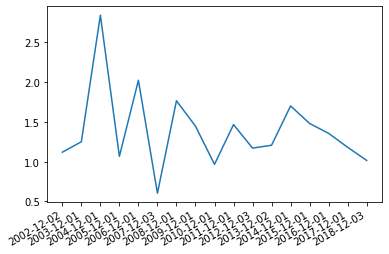

In [49]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['yield'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

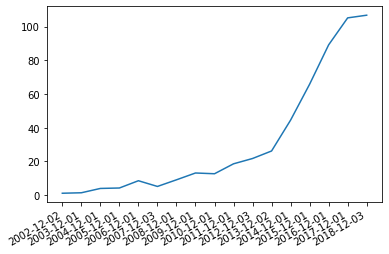

In [45]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['total'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

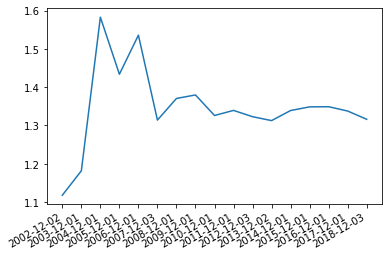

In [46]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['cagr'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

In [47]:
df_account

,start_date,end_date,filepath,stocks,yield,yields,total,cagr,win_rate,best_corp,worst_corp,best_stock_code,worst_stock_code
0,2002-12-02,2003-12-01,data/daily/12-1/2002-12-02.csv,"[022220, 021820, 002700, 007280, 014470, 01336...",1.118014,"[0.0, 1.0375647668393781, 0.6928104575163399, ...",1.118014,1.118014,0.233333,5.926471,0.000000,027040,022220
1,2003-12-01,2004-12-01,data/daily/12-1/2003-12-01.csv,"[006090, 011300, 021820, 003280, 002360, 00229...",1.249070,"[9.194139194139193, 0.797583081570997, 1.09862...",1.396478,1.181727,0.400000,9.194139,0.000000,006090,007110
2,2004-12-01,2005-12-01,data/daily/12-1/2004-12-01.csv,"[008830, 038010, 015230, 004780, 029480, 00978...",2.838060,"[1.647457627118644, 2.167816091954023, 3.81748...",3.963288,1.582530,1.000000,7.148148,1.579767,024830,066590
3,2005-12-01,2006-12-01,data/daily/12-1/2005-12-01.csv,"[011300, 005670, 008110, 009460, 038010, 07109...",1.066147,"[0.9309309309309309, 1.3089770354906054, 1.152...",4.225449,1.433733,0.500000,2.283951,0.113978,008830,009460
4,2006-12-01,2007-12-03,data/daily/12-1/2006-12-01.csv,"[004780, 009070, 005710, 039240, 004100, 01523...",2.020857,"[1.5406698564593302, 0.5566037735849056, 1.111...",8.539025,1.535613,0.700000,10.366748,0.161567,004090,032750
5,2007-12-03,2008-12-01,data/daily/12-1/2007-12-03.csv,"[009470, 038340, 006060, 010600, 083550, 00850...",0.603061,"[1.5202492211838006, 0.4036144578313253, 0.582...",5.149554,1.314100,0.066667,2.260331,0.083540,088910,004780
6,2008-12-01,2009-12-01,data/daily/12-1/2008-12-01.csv,"[038340, 081220, 066670, 004100, 019180, 03133...",1.763869,"[1.835820895522388, 2.43125, 4.12621359223301,...",9.083137,1.370537,0.966667,4.126214,0.833333,066670,007150
7,2009-12-01,2010-12-01,data/daily/12-1/2009-12-01.csv,"[011300, 017680, 054090, 019490, 024900, 06806...",1.445309,"[0.16064814814814815, 1.5081521739130435, 1.63...",13.127937,1.379668,0.833333,2.932331,0.160648,047440,011300
8,2010-12-01,2011-12-01,data/daily/12-1/2010-12-01.csv,"[011300, 002140, 005360, 079650, 039240, 03334...",0.965868,"[1.942363112391931, 0.9427374301675978, 2.2077...",12.679852,1.326075,0.366667,2.207792,0.076279,005360,025880
9,2011-12-01,2012-12-03,data/daily/12-1/2011-12-01.csv,"[004320, 006580, 053060, 024850, 032750, 05409...",1.464884,"[0.8978328173374613, 1.736842105263158, 1.9459...",18.574507,1.339343,0.800000,3.592593,0.550984,066130,024850


In [48]:
df_account.to_csv('log/' + MODEL_NAME + '-' + os.path.basename(DATA_DIR) + '.csv', index=False)